# MATHEMATICAL IMPLEMENTATION OF A FEED FORWARD NEURAL NETWORK WITH BACKPROPAGATION

## Abstract

This implementation demonstrates the mathematical foundations of backpropagation in a fully connected neural network using Python Numpy and Matplotlib for visualization. Our network processes 3-dimensional feature vectors through two hidden layers containing 4 and 3 neurons respectively, producing scalar predictions for regression targets. Using sigmoid activations and mean squared error loss, we explicitly derive and implement the gradient flow through each layer using the chain rule. This transparent, framework-free approach illuminates the mathematical principles underpinning modern deep learning optimizers while providing insight into how neural networks learn representations from data through iterative parameter updates.

## Step 1: Importing the necessary libraries

We begin by importing the necessary computational libraries and establishing the mathematical framework for our neural network implementation. NumPy provides efficient array operations essential for vectorized computations of forward propagation and gradient calculations, while Matplotlib enables visualization of the optimization trajectory.

In [277]:
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Defining the Neural Network Architecture  

Before implementing the feedforward and backpropagation processes, we define the structural parameters of our neural network.  
Each variable specifies the number of neurons in a given layer, determining how data flows and transforms through the network.  

- **sample_size:** number of training samples (rows in our dataset)  
- **input_size:** number of input features for each sample  
- **hidden1_size:** number of neurons in the first hidden layer  
- **hidden2_size:** number of neurons in the second hidden layer  
- **output_size:** number of neurons in the output layer  

These dimensions guide the shape of weight matrices and bias vectors during initialization, ensuring that matrix multiplications remain dimensionally consistent throughout forward and backward propagation.

In [278]:
sample_size = 5 #number of samples
input_size = 3 #number of feautures of the input layer
hidden1_size = 4 #number of nodes of the 1st hidden layer
hidden2_size = 3 #number of nodes of the 2nd hidden layer
output_size = 1 #number of nodes of the output layer

## Step 3: Defining Activation and Loss Functions  

Activation and loss functions are fundamental components of a neural network’s learning mechanism.  

- The **sigmoid activation function** introduces nonlinearity, allowing the network to model complex relationships beyond simple linear mappings.  
- Its **derivative**,is essential during backpropagation to propagate gradients backward through the network efficiently.  
- The **Mean Squared Error (MSE)** serves as the cost function, quantifying the difference between predicted outputs.  Minimizing this loss through gradient descent drives the learning process.  

Together, these functions establish the mathematical foundation for both forward propagation and gradient-based optimization.


In [ ]:
#Activation function
def sigmoid(z):
    return 1/(1 + np.exp(-z))
#Derivative of the activation function
def dsigmoid(h):
    return h*(1-h)
#Loss function (Mean squared Error)
def mse(Y_hat, Y_true):
    return 0.5*np.mean((Y_hat - Y_true)**2)

## Step 4: Initializing Weights and Biases  

We initialize the network parameters — weights and biases — for each layer using random values.  

- **Weights** (w1, w2, w3) determine the strength of the connections between neurons across layers.  
- **Biases** (b1, b2, b3) allow each neuron to shift its activation independently of the input, improving model flexibility.  

In [280]:
#Initializing the parameters

#Hidden Layer1
w1 = np.random.rand(input_size, hidden1_size)
b1 = np.random.rand(1, hidden1_size)
#hidden Layer2
w2 = np.random.rand(hidden1_size, hidden2_size)
b2 =  np.random.rand(1, hidden2_size)
#output Layer
w3 = np.random.rand(hidden2_size, output_size)
b3 = np.random.rand(1, output_size)

## Step 5: Generating Input and Target Data  

To test the network, we create synthetic data to serve as input features and corresponding target outputs:  

- **Input matrix (X):** Each of the `sample_size` rows represents one observation, and each column corresponds to one input feature.  
- **Target matrix (Y):** Contains the expected outputs that the network will attempt to approximate through training.  

In [281]:
#Initializing the inputs
X = np.random.rand(sample_size, input_size)
Y = np.random.rand(sample_size,1)

## Step 6: Setting Training Hyperparameters  

Before training the network, we define essential **hyperparameters** that control the learning process:

- **Learning rate (lr):** Determines the step size used to update weights during gradient descent.  
  A small value leads to slow but stable convergence, while a large value risks overshooting the minimum of the loss function.  
- **Epochs:** Represents the total number of complete passes through the training dataset.  
  Increasing this value allows the network to refine its parameters over time.  
- **Loss tracking:** An empty list is initialized to record the loss value at each epoch, allowing visualization of the optimization trajectory after training.  

In [ ]:
#Training parameters
lr = 0.01
epochs = 5000
#Tracking the loss function
loss_track = []

## Step 7: Training the Neural Network  

This step combines **forward propagation**, **loss computation**, and **backpropagation** into a complete training cycle that iteratively updates the network’s parameters.

### 1. Forward Propagation  
- Each layer performs a linear transformation followed by a nonlinear activation.  
- Information flows sequentially from the input through both hidden layers to the output.  
- The network’s prediction **Y_hat**is obtained at the output layer using the sigmoid activation function.  

### 2. Loss Computation  
- The **Mean Squared Error (MSE)** quantifies how far the predictions are from the target outputs.  
- This scalar loss value guides how parameters should be adjusted to minimize prediction error.  

### 3. Backpropagation  
- The error is propagated backward through the network using the **chain rule**.  
- Partial derivatives of the loss with respect to weights and biases are computed layer by layer:  
  - The output layer gradients measure the sensitivity of the final prediction to each weight.  
  - The hidden layers’ gradients capture how each neuron contributed to the final error.  
- These gradients are then used to update the parameters in the direction that reduces the loss.  

### 4. Parameter Update  
- Each weight and bias is adjusted using **gradient descent** with the learning rate (`lr`), controlling how aggressively the model learns.  
- Over many epochs, this iterative process minimizes the loss function, improving the model’s predictions.  

Together, these steps represent the complete **learning algorithm** that enables the neural network to approximate nonlinear relationships from data.

In [283]:
#Training the model
for epoch in range(epochs):
    #=======Forward pass========
    #Hidden Layer1
    z1 = np.dot(X,w1)+b1
    h1 = sigmoid(z1)
    #Hidden Layer2
    z2 = np.dot(h1,w2)+b2
    h2 = sigmoid(z2)
    #Output Layer
    z3 = np.dot(h2,w3)+b3
    h3 = sigmoid(z3)
    Y_hat = h3
    
    #=======Loss computation========
    Loss = mse(Y_hat, Y)
    loss_track.append(Loss)
    
    #=======Backpropagation========
    #Output Layer
    dh3 = Y_hat - Y
    dz3 = dh3 * dsigmoid(h3)
    dw3 = np.dot(h2.T, dz3)
    db3 = np.sum(dz3, axis = 0, keepdims = True)
    #Hidden Layer2
    dh2 = np.dot(dz3,w3.T)
    dz2 = dh2 * dsigmoid(h2)
    dw2 = np.dot(h1.T, dz2)
    db2 = np.sum(dz2, axis = 0, keepdims= True)
    #Hidden Layer2
    dh1 = np.dot(dz2,w2.T)
    dz1 = dh1 * dsigmoid(h1)
    dw1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis = 0, keepdims = True)
    
    #Update the paramaters
    w3 -= lr * dw3
    b3 -= lr * db3
    w2 -= lr * dw2
    b2 -= lr * db2
    w1 -= lr * dw1
    b1 -= lr * db1
    

# Step 8: Evaluating model performance

Model evaluation quantifies predictive accuracy and validates training effectiveness. The accuracy calculation uses **1−mean(|Y_hat - Y|)** to measure average prediction correctness across all samples. Comparing predictions **Y_hat** against true values **Y** reveals the model's actual performance on the training data, while percentage formatting provides an intuitive measure of success that facilitates interpretation and comparison with other models. 
These metrics transform the optimized weights into concrete evidence of the neural network's learning capability.

In [286]:
#Accuracy of the model
accuracy = (1 - np.mean(abs(Y_hat - Y)))*100
print(f'The true values are: \n {Y}')
print(f'The prediction is: \n{Y_hat}')
print(f'the accuracy of neural network is: {accuracy:.2f} %')

The true values are: 
 [[0.33734555]
 [0.01932763]
 [0.1243684 ]
 [0.41364267]
 [0.49286458]]
The prediction is: 
[[0.27733806]
 [0.27523915]
 [0.27917819]
 [0.27938524]
 [0.27598113]]
the accuracy of neural network is: 83.56 %


# Step 9: Visualizing training dynamics

Tracking and plotting the loss function throughout training provides critical insights into the optimization process. The **loss trajectory**, displayed on a logarithmic scale, reveals how effectively gradient descent minimizes the Mean Squared Error over successive epochs. A steadily decreasing curve indicates successful learning, while plateaus or oscillations may signal issues with learning rate or convergence. This visualization transforms abstract numerical optimization into an interpretable diagnostic tool, allowing practitioners to assess training stability, detect overfitting or underfitting, and validate that the network has achieved satisfactory convergence before deployment.

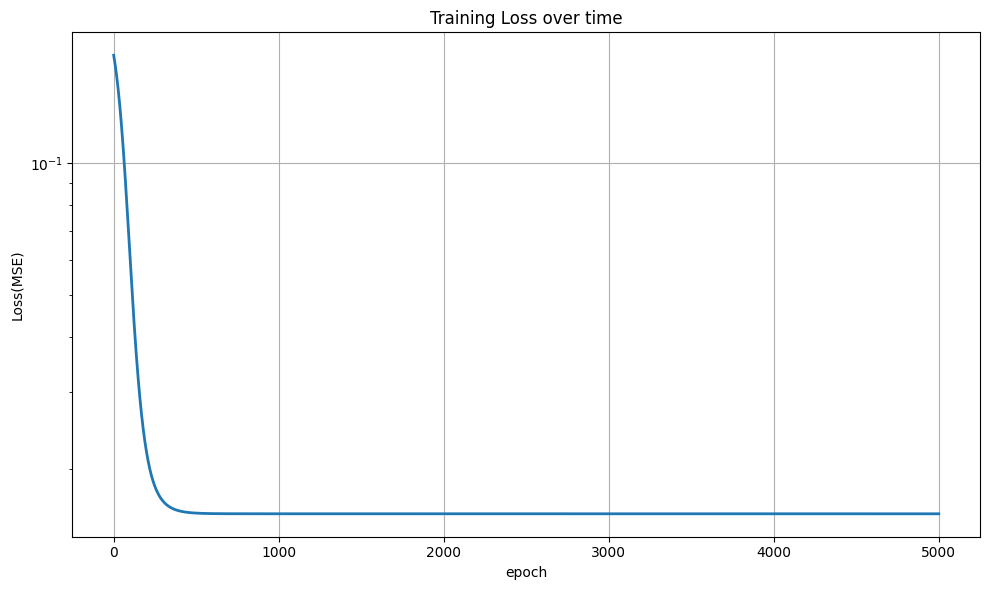

In [285]:
#Plotting the loss function
plt.figure(figsize = (10,6))
plt.plot(loss_track, linewidth = 2)
plt.yscale('log')
plt.grid(True)
plt.title('Training Loss over time')
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.tight_layout()
plt.show()

## Conclusion

This implementation successfully demonstrates the mathematical foundations of neural network learning through explicit backpropagation. By constructing a two-hidden-layer network from first principles using only NumPy, we traced the complete gradient flow from output error back through each layer using the chain rule. The network achieved convergence through iterative weight updates driven by gradient descent, with the loss trajectory confirming successful optimization. This transparent, framework-free approach reveals the elegant mathematical machinery underlying modern deep learning: how nonlinear activations enable complex function approximation, how the chain rule enables efficient gradient computation, and how simple iterative updates gradually sculpt network parameters to minimize prediction error. While production systems employ sophisticated frameworks and optimizations, understanding these core principles—forward propagation, loss computation, gradient calculation, and parameter updates—remains essential for developing intuition about neural network behavior, diagnosing training issues, and designing effective architectures.